# Lending club case study



# Data Cleaning 1

### Load the loan file and understand the data

In [2]:
# load all the required packages
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
import numpy as np
import seaborn as sns


In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# check the encoding of the loans file
with open("loan.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [4]:
## Load the companies into a dataframe with the correct encoding.  Though chardet says encoding of companies file is Windows-1252
## the encoding of the file is ISO-8859-1
loan = pd.read_csv("loan.csv",low_memory=False)

In [5]:
# check if loan is loaded ok
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     nan   
1           Apr-99               5                     nan   
2           Nov-01               2                     nan   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     nan         3        0      13648     83.70%          9   
1                     nan         3        0       1687      9.40%          4   
2                     nan         2        0       2956     98.50%         10   
3                     nan        10        0       5598        21%         37   
4                     nan        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

In [6]:
# Check column info of loan to know the datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [8]:
##  drop the columns that have only null values
loan.dropna(how='all',axis=1,inplace=True)

In [9]:
# Check column info of loan to know the datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [11]:
##  drop columns that are not significant for analysis and have more than 60% nulls
loan.drop(columns=['pymnt_plan','url','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','tax_liens','last_credit_pull_d','last_pymnt_d','last_pymnt_amnt'],inplace=True)
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [12]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
purpose                      0.00
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal                    0.00
revol_util                   0.13
total_acc                    0.00
initial_list_s

In [13]:
##  replace the emp title to Unknown if null
loan['emp_title'].fillna('Unknown',inplace=True)

In [14]:
##  replace the emp length to Unknown if null
loan['emp_length'].fillna('Unknown',inplace=True)

In [15]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    0.00
emp_length                   0.00
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
purpose                      0.00
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal                    0.00
revol_util                   0.13
total_acc                    0.00
initial_list_s

In [16]:
##  check number of rows having null revol_util
loan[loan['revol_util'].isnull()].shape

(50, 46)

In [17]:
## remove the rows that have null
loan =  loan[~loan['revol_util'].isnull()]

In [18]:
# check the range of values in the collections column
loan['collections_12_mths_ex_med'].describe()

count   39611.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: collections_12_mths_ex_med, dtype: float64

In [19]:
# check the range of values in the public recorded bankruptices column
loan['pub_rec_bankruptcies'].describe()

count   38970.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

In [20]:
## remove the rows that have null 
loan =  loan[~loan['pub_rec_bankruptcies'].isnull()]

In [21]:
## check the range of values in chargeoff within 12 months
loan['chargeoff_within_12_mths'].describe()

count   38968.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: chargeoff_within_12_mths, dtype: float64

In [22]:
##  drop columns that have no range of values
loan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths'],inplace=True)
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [23]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 0.00
emp_length                0.00
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.00
total_acc                 0.00
initial_list_status       0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_py

In [24]:
## check the number of rows in the loan data frame after handling missing values
loan.shape

(38970, 44)

In [25]:
## check loan info
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38970 entries, 0 to 39680
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38970 non-null  int64  
 1   member_id                38970 non-null  int64  
 2   loan_amnt                38970 non-null  int64  
 3   funded_amnt              38970 non-null  int64  
 4   funded_amnt_inv          38970 non-null  float64
 5   term                     38970 non-null  object 
 6   int_rate                 38970 non-null  object 
 7   installment              38970 non-null  float64
 8   grade                    38970 non-null  object 
 9   sub_grade                38970 non-null  object 
 10  emp_title                38970 non-null  object 
 11  emp_length               38970 non-null  object 
 12  home_ownership           38970 non-null  object 
 13  annual_inc               38970 non-null  float64
 14  verification_status   

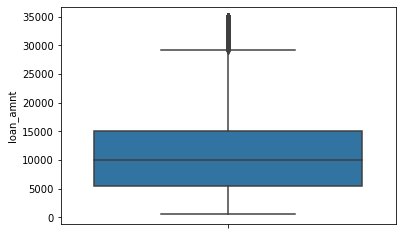

In [29]:
## check the range of values in loan amt
sns.boxplot(y='loan_amnt',data=loan)

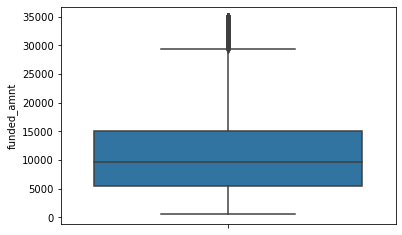

In [30]:
## check the range of values in funded amount
sns.boxplot(y='funded_amnt',data=loan)

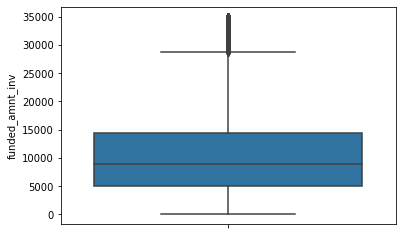

In [31]:
## check the range of values in funded amount inv
sns.boxplot(y='funded_amnt_inv',data=loan)

From the above we can see the range of loan amount does not exceed 35,000 which is valid as per Lending club's model of providing loan upto 40,000

In [32]:
## check the unique values in term
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [33]:
## check the values in the int rate as its a object type
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [34]:
## change the int rate to float by removing the % and converting to float
loan['int_rate']=loan['int_rate'].str.replace("%","")
loan['int_rate']=loan['int_rate'].astype(float)

In [35]:
##  check the int rate again
loan['int_rate'].head()

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [36]:
loan['int_rate'].dtype

dtype('float64')

In [37]:
## check the range of values in the int rate
loan['int_rate'].describe()

count   38970.00
mean       12.04
std         3.74
min         5.42
25%         9.25
50%        11.86
75%        14.61
max        24.59
Name: int_rate, dtype: float64

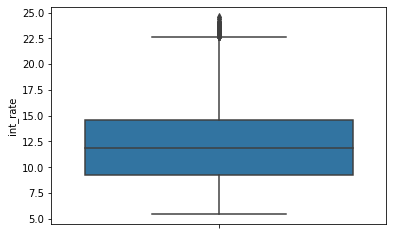

In [38]:
## check if there are any outliers
sns.boxplot(y='int_rate',data=loan)

There are outlier values but they are valid as loan grades G1 to G5 have rates as high as 25%

In [39]:
##  check the range of values in installment
loan['installment'].describe()

count   38970.00
mean      324.81
std       208.87
min        16.08
25%       167.32
50%       280.44
75%       430.78
max      1305.19
Name: installment, dtype: float64

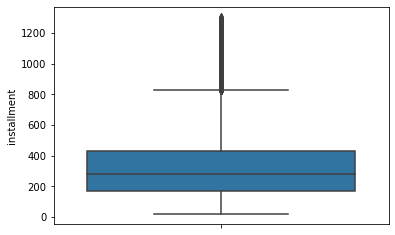

In [41]:
##  check for any outliers 
sns.boxplot(y='installment',data=loan)

The outliers look valid as installments as high as $1300 are valid

In [42]:
##  check the values in grade
loan['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [43]:
##  check the values in sub-grade
sorted(loan['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

There are no invalid values in the grad and subgrade columns

In [44]:
##  check the values counts in emp_title
loan['emp_title'].value_counts()

Unknown                                                                           2412
US Army                                                                            132
Bank of America                                                                    108
IBM                                                                                 66
AT&T                                                                                59
Kaiser Permanente                                                                   55
USAF                                                                                54
Wells Fargo                                                                         54
UPS                                                                                 53
US Air Force                                                                        51
Lockheed Martin                                                                     44
Walmart                                    

In [45]:
##  convert the emp title to lower case
loan['emp_title']=loan['emp_title'].str.lower()

In [46]:
##  check the value counts again
loan['emp_title'].value_counts()

unknown                                                                           2412
us army                                                                            207
bank of america                                                                    136
walmart                                                                             80
at&t                                                                                79
ibm                                                                                 68
kaiser permanente                                                                   68
wells fargo                                                                         67
verizon wireless                                                                    63
ups                                                                                 62
usps                                                                                57
self                                       

We can see that the value changed after converting to lower case

In [47]:
##  check the unique values in emp_length
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'Unknown'],
      dtype=object)

In [48]:
##  check the value counts in emp length
loan['emp_length'].value_counts()

10+ years    8759
< 1 year     4404
2 years      4299
3 years      4030
4 years      3384
5 years      3245
1 year       3142
6 years      2194
7 years      1748
8 years      1452
9 years      1241
Unknown      1072
Name: emp_length, dtype: int64

In [49]:
## check the unique values in home ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [50]:
## check the range of values in the annual income
loan['annual_inc'].describe()

count     38970.00
mean      68989.78
std       63150.70
min        4000.00
25%       40800.00
50%       59100.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64

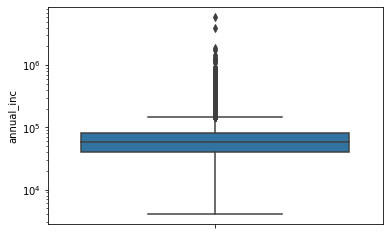

In [51]:
##  check the outliers in the annual inc
sns.boxplot(y='annual_inc',data=loan)
plt.yscale('log')
plt.show()

There are significant number of outliers possibly due to incorrect details provided by the borrower

In [53]:
##  There are outliers with very high annnual income in the range of millions
np.percentile(loan['annual_inc'],99)

234185.9999999986

In [54]:
## Remove the outliers on annual inc beyond 99 percentile
loan=loan[~(loan['annual_inc'] > np.percentile(loan['annual_inc'],99))]

In [55]:
## check the range of values in the annual income
loan['annual_inc'].describe()

count    38580.00
mean     65603.45
std      35149.07
min       4000.00
25%      40249.00
50%      58320.00
75%      81000.00
max     234000.00
Name: annual_inc, dtype: float64

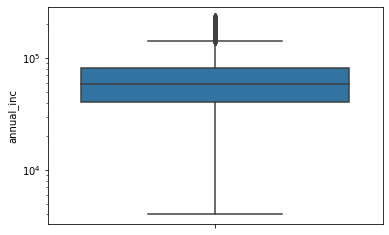

In [56]:
##  check the outliers in the annual inc
sns.boxplot(y='annual_inc',data=loan)
plt.yscale('log')
plt.show()

The range looks much better after removing the  major outliers

In [57]:
## check the unique values in the verification status
loan['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [58]:
## check the format of the issue date
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [59]:
## convert the issue date string to datetime format
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [60]:
## check the max value to know the upper range
loan['issue_d'].max()

Timestamp('2011-12-01 00:00:00')

In [61]:
## check the min value to know the lower range
loan['issue_d'].min()

Timestamp('2007-08-01 00:00:00')

In [62]:
## check the unique values in the purpose column to identify if there are any duplicates or invalid values
loan['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [63]:
## check the unique values in the zip code
loan['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

Zip codes are only partial. Hence will not be useful in our analysis

In [64]:
## check the unique values in the address state and identify any invalid values
loan['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN'], dtype=object)

In [65]:
## check the range of the dti to identify any anomalies
loan['dti'].describe()

count   38580.00
mean       13.42
std         6.65
min         0.00
25%         8.32
50%        13.51
75%        18.68
max        29.99
Name: dti, dtype: float64

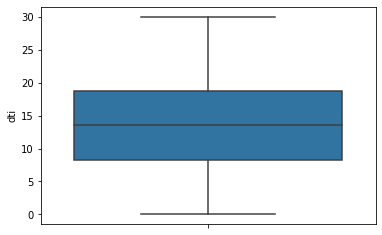

In [66]:
## check if there are any outliers
sns.boxplot(y='dti',data=loan)

dti seems to be in the expected range

In [67]:
## check if there are any unexpected values in number of delinquencies in 2 years
loan['delinq_2yrs'].describe()

count   38580.00
mean        0.14
std         0.49
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        11.00
Name: delinq_2yrs, dtype: float64

In [68]:
##  check the format of the earliest credit line date
loan['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [69]:
##  convert the earliest credit line to datetime format
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [70]:
## check the max value of the earliest credit line
loan['earliest_cr_line'].max()

Timestamp('2068-12-01 00:00:00')

In [71]:
## check the min value of the earliest credit line
loan['earliest_cr_line'].min()

Timestamp('1969-02-01 00:00:00')

In [72]:
loan['earliest_cr_line'].dt.year.unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1973, 1979, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2062, 2068, 1974, 2064, 2067,
       2063, 2065, 2054, 2066, 2059, 2056, 2046, 2050, 2061], dtype=int64)

There are earliest credit line values that are in the future. This is incorrect

In [73]:
##  check the number of rows with earliest credit line date greater than the issue date
loan[loan['earliest_cr_line'].dt.year > loan['issue_d'].dt.year].shape

(85, 44)

In [74]:
##  check the  rows with earliest credit line date greater than the issue date
loan[loan['earliest_cr_line'] > loan['issue_d']][['issue_d','earliest_cr_line','delinq_2yrs']]

issue_d earliest_cr_line  delinq_2yrs
1576  2011-12-01       2062-09-01            0
1764  2011-12-01       2068-09-01            2
2792  2011-11-01       2064-09-01            0
3274  2011-11-01       2067-09-01            0
3403  2011-11-01       2067-06-01            0
3595  2011-11-01       2067-08-01            0
3976  2011-11-01       2063-12-01            0
4426  2011-11-01       2068-09-01            0
4435  2011-11-01       2068-09-01            0
4478  2011-10-01       2063-03-01            0
5092  2011-10-01       2068-08-01            0
5399  2011-10-01       2065-11-01            0
5673  2011-10-01       2065-05-01            0
6118  2011-10-01       2054-10-01            0
6416  2011-10-01       2068-06-01            0
7424  2011-09-01       2065-10-01            0
7460  2011-09-01       2066-04-01            1
7562  2011-09-01       2068-09-01            0
7646  2011-09-01       2068-03-01            0
7872  2011-09-01       2062-09-01            0
8288  2011-09-01       2065-09-01            0
8462  2011-09-01       2067-04-01            0
8783  2011-09-01       2063-10-01            0
8883  2011-08-01       2067-04-01            0
9139  2011-08-01       2063-10-01            0
10315 2011-08-01       2064-10-01            0
10878 2011-07-01       2063-05-01            0
11255 2011-07-01       2067-07-01            0
11303 2011-07-01       2062-09-01            0
12025 2011-07-01       2066-11-01            0
12166 2011-07-01       2068-03-01            0
12869 2011-07-01       2065-05-01            0
13009 2011-06-01       2068-02-01            0
13089 2011-06-01       2064-07-01            0
13187 2011-06-01       2067-11-01            0
13450 2011-06-01       2064-04-01            0
13957 2011-06-01       2059-06-01            0
13975 2011-06-01       2056-09-01            0
14033 2011-06-01       2066-06-01            0
14077 2011-06-01       2046-01-01            0
14202 2011-06-01       2066-03-01            0
14234 2011-05-01       2063-01-01            0
15269 2011-05-01       2050-12-01            0
15392 2011-05-01       2066-03-01            0
15480 2011-05-01       2068-01-01            0
16933 2011-04-01       2068-02-01            0
17559 2011-03-01       2066-02-01            0
18754 2011-03-01       2064-09-01            0
18782 2011-03-01       2065-10-01            0
19239 2011-02-01       2064-09-01            0
19370 2011-02-01       2066-11-01            0
19645 2011-02-01       2061-12-01            0
20709 2011-01-01       2068-08-01            0
20985 2011-01-01       2066-11-01            0
21059 2011-01-01       2068-08-01            0
21086 2011-01-01       2068-12-01            0
22031 2010-12-01       2054-11-01            1
23102 2010-11-01       2064-04-01            0
24247 2010-10-01       2068-08-01            0
24701 2010-10-01       2062-09-01            0
25117 2010-10-01       2065-12-01            0
25769 2010-09-01       2067-11-01            0
26238 2010-08-01       2066-11-01            0
26381 2010-08-01       2063-09-01            0
26911 2010-08-01       2062-11-01            0
29464 2010-06-01       2063-01-01            3
30663 2010-04-01       2067-10-01            0
30679 2010-04-01       2067-09-01            0
31938 2010-02-01       2067-05-01            0
32163 2010-02-01       2061-11-01            0
32775 2010-01-01       2067-02-01            0
32850 2010-01-01       2068-11-01            0
33028 2010-01-01       2066-03-01            0
33788 2009-12-01       2065-02-01            0
33923 2009-11-01       2067-10-01            0
33994 2009-11-01       2064-04-01            0
34469 2009-10-01       2067-11-01            0
35783 2009-07-01       2067-07-01            0
35792 2009-07-01       2068-02-01            0
35899 2009-07-01       2067-04-01            0
36694 2009-05-01       2068-01-01            0
37288 2009-03-01       2066-12-01            0
37328 2009-03-01       2068-10-01            0
37442 2009-02-01       2067-09-01            0
38068 2008-12-

In [75]:
##  if the earliest credit line date is greater than issue date then consider the issue date as the earliest credit line date.
##  if there is a delinquency in then last 2 years then subtract 2 years from the issue date.  
loan['earliest_cr_line_chng']=loan.apply(lambda x: x.earliest_cr_line if x.earliest_cr_line <= x.issue_d else (x.issue_d if x.delinq_2yrs == 0 else x.issue_d - pd.DateOffset(years=2)), axis=1)

In [76]:
## check of the earliest credit line column is created as per above expectation
loan[loan['earliest_cr_line'] > loan['issue_d']][['issue_d','earliest_cr_line','delinq_2yrs','earliest_cr_line_chng']]

issue_d earliest_cr_line  delinq_2yrs earliest_cr_line_chng
1576  2011-12-01       2062-09-01            0            2011-12-01
1764  2011-12-01       2068-09-01            2            2009-12-01
2792  2011-11-01       2064-09-01            0            2011-11-01
3274  2011-11-01       2067-09-01            0            2011-11-01
3403  2011-11-01       2067-06-01            0            2011-11-01
3595  2011-11-01       2067-08-01            0            2011-11-01
3976  2011-11-01       2063-12-01            0            2011-11-01
4426  2011-11-01       2068-09-01            0            2011-11-01
4435  2011-11-01       2068-09-01            0            2011-11-01
4478  2011-10-01       2063-03-01            0            2011-10-01
5092  2011-10-01       2068-08-01            0            2011-10-01
5399  2011-10-01       2065-11-01            0            2011-10-01
5673  2011-10-01       2065-05-01            0            2011-10-01
6118  2011-10-01       2054-10-01            0            2011-10-01
6416  2011-10-01       2068-06-01            0            2011-10-01
7424  2011-09-01       2065-10-01            0            2011-09-01
7460  2011-09-01       2066-04-01            1            2009-09-01
7562  2011-09-01       2068-09-01            0            2011-09-01
7646  2011-09-01       2068-03-01            0            2011-09-01
7872  2011-09-01       2062-09-01            0            2011-09-01
8288  2011-09-01       2065-09-01            0            2011-09-01
8462  2011-09-01       2067-04-01            0            2011-09-01
8783  2011-09-01       2063-10-01            0            2011-09-01
8883  2011-08-01       2067-04-01            0            2011-08-01
9139  2011-08-01       2063-10-01            0            2011-08-01
10315 2011-08-01       2064-10-01            0            2011-08-01
10878 2011-07-01       2063-05-01            0            2011-07-01
11255 2011-07-01       2067-07-01            0            2011-07-01
11303 2011-07-01       2062-09-01            0            2011-07-01
12025 2011-07-01       2066-11-01            0            2011-07-01
12166 2011-07-01       2068-03-01            0            2011-07-01
12869 2011-07-01       2065-05-01            0            2011-07-01
13009 2011-06-01       2068-02-01            0            2011-06-01
13089 2011-06-01       2064-07-01            0            2011-06-01
13187 2011-06-01       2067-11-01            0            2011-06-01
13450 2011-06-01       2064-04-01            0            2011-06-01
13957 2011-06-01       2059-06-01            0            2011-06-01
13975 2011-06-01       2056-09-01            0            2011-06-01
14033 2011-06-01       2066-06-01            0            2011-06-01
14077 2011-06-01       2046-01-01            0            2011-06-01
14202 2011-06-01       2066-03-01            0            2011-06-01
14234 2011-05-01       2063-01-01            0            2011-05-01
15269 2011-05-01       2050-12-01            0            2011-05-01
15392 2011-05-01       2066-03-01            0            2011-05-01
15480 2011-05-01       2068-01-01            0            2011-05-01
16933 2011-04-01       2068-02-01            0            2011-04-01
17559 2011-03-01       2066-02-01            0            2011-03-01
18754 2011-03-01       2064-09-01            0            2011-03-01
18782 2011-03-01       2065-10-01            0            2011-03-01
19239 2011-02-01       2064-09-01            0            2011-02-01
19370 2011-02-01       2066-11-01            0            2011-02-01
19645 2011-02-01       2061-12-01            0            2011-02-01
20709 2011-01-01       2068-08-01            0            2011-01-01
20985 2011-01-01       2066-11-01            0            2011-01-01
21059 2011-01-01       2068-08-01            0            2011-01-01
21086 2011-01-01       2068-12-01            0            2011-01-01
22031 2010-12-01       2054-11-01            1            2008-12-01
23102 2

In [77]:
##  check the range of values in the inquiry in the last 6 months
loan['inq_last_6mths'].describe()

count   38580.00
mean        0.86
std         1.07
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         8.00
Name: inq_last_6mths, dtype: float64

In [221]:
##  check the range of values in the inquiry in the last 6 months
loan['open_acc'].describe()

count   38903.00
mean        9.30
std         4.38
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

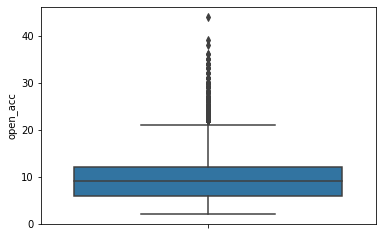

In [79]:
## check if there are any outliers
sns.boxplot(y='open_acc',data=loan)

In [78]:
loan[loan['open_acc']>12].shape

(7948, 45)

There are significant number of borrowers who have more than 75% percentile(12 open accounts). Assuming this is valid

In [224]:
## check the range of the pub records
loan['pub_rec'].describe()

count   38903.00
mean        0.06
std         0.24
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: pub_rec, dtype: float64

In [225]:
# check the range of the revolving balance
loan['revol_bal'].describe()

count    38903.00
mean     13404.31
std      15848.72
min          0.00
25%       3745.00
50%       8885.00
75%      17088.00
max     149588.00
Name: revol_bal, dtype: float64

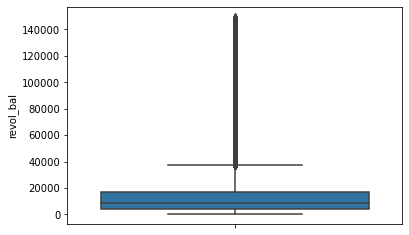

In [226]:
##  check for outliers in the revolving balance
sns.boxplot(y='revol_bal',data=loan)

In [84]:
loan[loan['revol_bal'] > 100000][['revol_bal','annual_inc','open_acc']]

revol_bal  annual_inc  open_acc
1366      130920   210000.00         7
1473      131949   180000.00         9
1491      124744   160000.00        17
1529      106406   120000.00        13
2568      101287   125000.00        16
3167      103754    72000.00        10
3194      110856   110000.00        17
3301      101553   172000.00        20
3377      123416   156000.00        13
3434      100428   131000.00         7
3536      112522   133000.00        10
3567      101144   180000.00        15
3591      105240   111239.96        10
3733      140967    72000.00        10
3868      106176   175000.00         9
3874      108339    49772.64        11
3945      116354   125000.00        16
4183      131006   228000.00        18
4309      106307   120000.00        10
4363      103774   110256.00         8
4411      116794   148350.00        17
4457      117243   160000.00        17
4746      125027    80796.00         7
4867      133681    44400.00         6
5252      106296   150000.00        16
5739      124659    40000.00        10
5741      101058   170004.00        10
5885      108024   120000.00         9
5902      111638   120000.00         8
6138      109990   170000.00        19
6623      119126   175000.00        17
6624      128872   135000.00         9
6888      145384   125000.00         7
7344      116244   110000.00        12
7711      102330   220000.00        12
7784      116063   150000.00        11
8133      124386    70000.00         7
8205      116686   120000.00         7
8367      115901   200000.00        18
8496      130869   160000.00         6
8626      105032   200000.00         7
8631      128290    73000.00        12
8815      115836   120000.00        16
8829      109993   198204.00        13
9131      145518   120000.00        14
9257      100511   225000.00         8
9390      101716   202000.00        10
9741      104406   127035.00        13
9746      114641   180000.00        20
9845      107192    76800.00         9
10190     107504   155000.00        15
10427     105845    96000.00        12
10835     115326    83000.00         9
10909     111796   150000.00         9
11006     129821   160000.00        10
11179     129071   225000.00        10
11308     122129   184000.00        22
11388     101423   186600.00        12
11435     125558   170000.00        11
11928     149588   200000.00        14
12316     120206   230000.00        18
12379     137661   180000.00        17
12548     123980   150000.00        17
12747     136456   185000.00        35
12815     113674   154000.00         7
12850     147365   160000.00        19
13175     147897   137004.00        18
13241     118847   230000.00        18
13257     131767   141000.00        14
13312     137143   180000.00        17
13355     103883   105000.00         8
14006     142650   180000.00        13
14119     133264   159996.00        12
14131     110856   140000.00        14
14150     146472   205000.00        10
14200     113658   160000.00         5
14413     106585   100904.00         4
14416     107671   115000.00        14
15097     147750   204996.00        10
15215     149000    91000.00         7
15240     145235   200000.00        12
15640     120691   150600.00        17
15686     118412   130000.00        11
16006     103323   180000.00        13
16483     126502   150000.00        10
16484     127882   110000.00        18
16938     120538   225000.00        13
17120     120881    44400.00        17
17577     105730   185000.00         9
17671     103777   150000.00        13
17885     138552   225000.00        14
17938     113680   150000.00         8
18133     123611   146775.00        14
18202     130105    80000.00         5
18299     119970   160000.00         9
18335     146762   220000.00        17
18400     111611    82000.00        15
18542     104304   125000.00        13
19057     101429    74000.00        12
19422     129538   145000.00        12
20467     113671   140004.00         9
20485     140820   170000.00 

Most of the higher revolving balances are with people with high annual income. However there are exceptions. So no reason to consider the outliers as invalid

In [227]:
## check the format of the revol-util
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [228]:
## conver the revol util to float by removing the % and then converting to float
loan['revol_util']=loan['revol_util'].str.replace("%","")
loan['revol_util']=loan['revol_util'].astype(float)
loan['revol_util'].head()

0   83.70
1    9.40
2   98.50
3   21.00
4   53.90
Name: revol_util, dtype: float64

In [229]:
##  check the number of total accounts
loan['total_acc'].describe()

count   38903.00
mean       22.17
std        11.39
min         2.00
25%        14.00
50%        21.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64

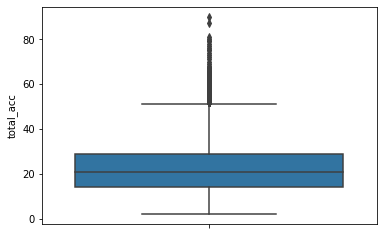

In [230]:
##  check if there are any outliers
sns.boxplot(y='total_acc',data=loan)

Borrowers have close to 40 accounts also.  So no clear inference to say that 90 accounts is invalid

In [85]:
## check the unique values in initial list status
loan['initial_list_status'].unique()

array(['f'], dtype=object)

In [86]:
## check the unique values in policy code
loan['policy_code'].unique()

array([1], dtype=int64)

In [87]:
## check the unique values in application type
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [88]:
## check the range of values in account now delinq
loan['acc_now_delinq'].describe()

count   38580.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: acc_now_delinq, dtype: float64

In [89]:
## check the range of values in deling amount
loan['delinq_amnt'].describe()

count   38580.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: delinq_amnt, dtype: float64

The initial list status, policy code, acc now delinq, delin amount do not have details perform analysis. So these can be removed

In [90]:
loan.drop(columns=['zip_code','initial_list_status','policy_code','acc_now_delinq','delinq_amnt'],inplace=True)
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'application_type', 'pub_rec_bankruptcies', 'earliest_cr_line_chng'],
      dtype='object')

In [91]:
##  Save the cleaned dataframe to a csv
loan.to_csv('loan_clean.csv',index=False)

# Loan Analysis

In [3]:
# load the cleaned file into a dataframe
loan_df = pd.read_csv("loan_clean.csv",low_memory=False)

In [4]:
##  check if the dataframe is loaded fime
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ...   total_pymnt total_pymnt_inv  \
0     10.65       162.87     B        B2  ...   5863.155187         5833.84   
1     15.27        59.83     C        C4  ...   1008.710000         1008.71   
2     15.96        84.33     C        C5  ...   3005.666844         3005.67   
3     13.49       339.31     C        C1  ...  12231.890000        12231.89   
4     12.69        67.79     B        B5  ...   3513.330000         3513.33   

  total_rec_prncp  total_rec_int total_rec_late_fee recoveries  \
0         5000.00         863.16               0.00       0.00   
1          456.46         435.17               0.00     117.08   
2         2400.00         605.67               0.00       0.00   
3        10000.00        2214.92              16.97       0.00   
4         2475.94        1037.39               0.00       0.00   

  collection_recovery_fee application_type pub_rec_bankruptcies  \
0                    0.00       INDIVIDUAL                  0.0   
1                    1.11       INDIVIDUAL                  0.0   
2                    0.00       INDIVIDUAL                  0.0   
3                    0.00       INDIVIDUAL                  0.0   
4                    0.00       INDIVIDUAL                  0.0   

   earliest_cr_line_chng  
0             1985-01-01  
1             1999-04-01  
2             2001-11-01  
3             1996-02-01  
4             1996-01-01  

[5 rows x 40 columns]

In [5]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [6]:
##  Get the total % of loans in each status
loan_df.groupby('loan_status')['loan_status'].count()/loan_df['loan_status'].shape*100

loan_status
Charged Off    14.131674
Current         2.918611
Fully Paid     82.949715
Name: loan_status, dtype: float64

In [7]:
##  create a loan status category for Good loan and Bad loan based on status.  Charged off is Bad loan and other 2 statuses are good loan
loan_df['status_catg'] = loan_df['loan_status'].apply(lambda x: "Bad Loan" if x=='Charged Off' else "Good Loan")

In [8]:
##  Get the total % of loans in each status
loan_df.groupby('status_catg')['status_catg'].count()/loan_df['status_catg'].shape*100

status_catg
Bad Loan     14.131674
Good Loan    85.868326
Name: status_catg, dtype: float64

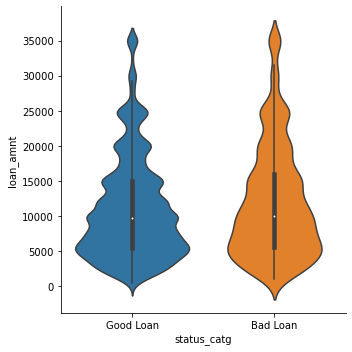

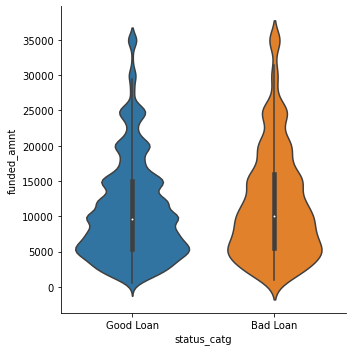

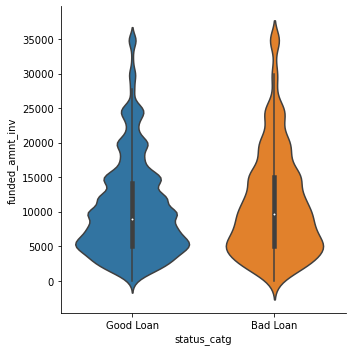

In [153]:
sns.catplot(x='status_catg',y='loan_amnt',kind='violin',data=loan_df)
sns.catplot(x='status_catg',y='funded_amnt',kind='violin',data=loan_df)
sns.catplot(x='status_catg',y='funded_amnt_inv',kind='violin',data=loan_df)
plt.show()

In [74]:
cut_labels = ['0K-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K','25K-30K', '30K-35K','35K-40K']
loan_df['loan_amnt_range']=pd.cut(loan_df['loan_amnt'], bins=np.linspace(0,40000,9),labels=cut_labels)

In [76]:
p_loan = loan_df.pivot_table(index='loan_amnt_range', columns='status_catg', values='id', aggfunc='count', fill_value=0)

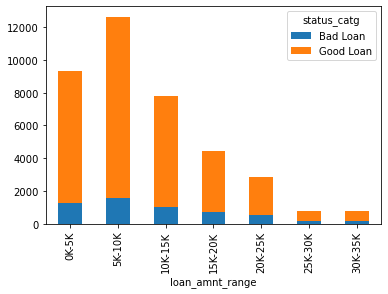

In [78]:
p_loan.plot(kind="bar",stacked = True)
plt.show()

In [79]:
p_loan['Bad_loan_perc'] = p_loan['Bad Loan']/(p_loan['Bad Loan']+p_loan['Good Loan'])*100
p_loan

status_catg      Bad Loan  Good Loan  Bad_loan_perc
loan_amnt_range                                    
0K-5K                1275       8027      13.706730
5K-10K               1602      11034      12.678063
10K-15K              1027       6783      13.149808
15K-20K               724       3729      16.258702
20K-25K               510       2354      17.807263
25K-30K               141        614      18.675497
30K-35K               173        587      22.763158

In [32]:
p1 = loan_df.pivot_table(index='term', columns='status_catg', values='id', aggfunc='count', fill_value=0)

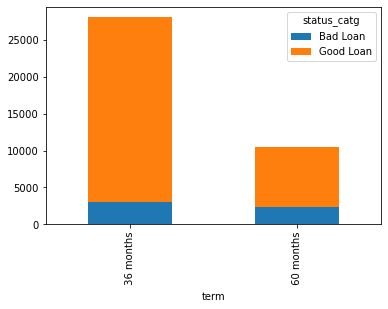

In [33]:
p1.plot(kind="bar",stacked = True)
plt.show()

In [43]:
p1['Bad_loan_perc'] = p1['Bad Loan']/(p1['Bad Loan']+p1['Good Loan'])*100
p1

status_catg  Bad Loan  Good Loan  Bad_loan_perc
term                                           
 36 months       3072      25013      10.938223
 60 months       2380       8115      22.677465

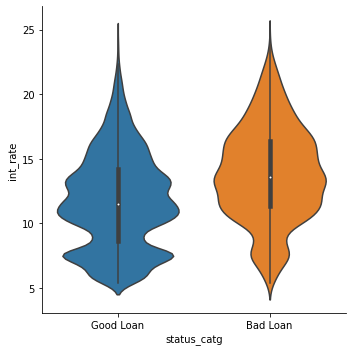

In [60]:
sns.catplot(x='status_catg',y='int_rate',kind='violin',data=loan_df)

In [44]:
loan_df['int_rate'].describe()

count    38580.000000
mean        12.025765
std          3.734563
min          5.420000
25%          9.205000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [61]:
cut_labels = ['0-5', '5-10', '10-15', '15-20', '20-25']
loan_df['int_rate_range']=pd.cut(loan_df['int_rate'], bins=np.linspace(0,25,6),labels=cut_labels)

In [62]:
p2 = loan_df.pivot_table(index='int_rate_range', columns='status_catg', values='id', aggfunc='count', fill_value=0)

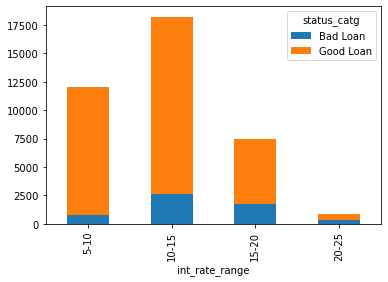

In [63]:
p2.plot(kind="bar",stacked = True)
plt.show()

In [64]:
p2['Bad_loan_perc'] = p2['Bad Loan']/(p2['Bad Loan']+p2['Good Loan'])*100
p2

status_catg     Bad Loan  Good Loan  Bad_loan_perc
int_rate_range                                    
5-10                 800      11221       6.655020
10-15               2604      15615      14.292771
15-20               1760       5741      23.463538
20-25                288        551      34.326579

In [80]:
p3 = loan_df.pivot_table(index='grade', columns='status_catg', values='id', aggfunc='count', fill_value=0)

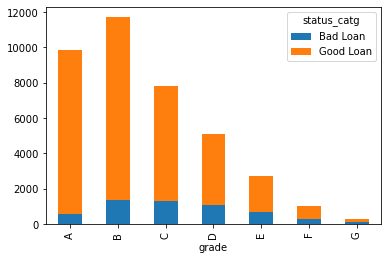

In [81]:
p3.plot(kind="bar",stacked = True)
plt.show()

In [82]:
p3['Bad_loan_perc'] = p3['Bad Loan']/(p3['Bad Loan']+p3['Good Loan'])*100
p3

status_catg  Bad Loan  Good Loan  Bad_loan_perc
grade                                          
A                 595       9281       6.024706
B                1387      10333      11.834471
C                1304       6516      16.675192
D                1076       4041      21.027946
E                 690       2051      25.173294
F                 303        701      30.179283
G                  97        205      32.119205

In [83]:
p4 = loan_df.pivot_table(index='sub_grade', columns='status_catg', values='id', aggfunc='count', fill_value=0)

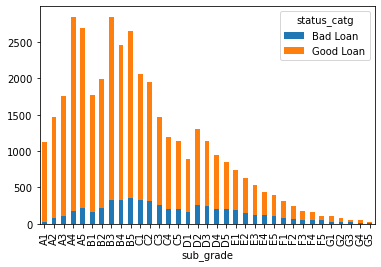

In [84]:
p4.plot(kind="bar",stacked = True)
plt.show()

In [87]:
p4['Bad_loan_perc'] = p4['Bad Loan']/(p4['Bad Loan']+p4['Good Loan'])*100
p4.sort_values(by='Bad_loan_perc',ascending=False)

status_catg  Bad Loan  Good Loan  Bad_loan_perc
sub_grade                                      
F5                 52         59      46.846847
G3                 19         28      40.425532
G5                 10         18      35.714286
G2                 26         48      35.135135
F4                 51        108      32.075472
G1                 30         70      30.000000
E4                124        315      28.246014
F2                 66        174      27.500000
F3                 48        128      27.272727
F1                 86        232      27.044025
E5                104        285      26.735219
E1                192        551      25.841184
D5                206        640      24.349882
E2                154        480      24.290221
G4                 12         41      22.641509
D4                206        738      21.822034
D3                246        889      21.674009
E3                116        420      21.641791
D2                258       1044      19.815668
D1                160        730      17.977528
C3                264       1210      17.910448
C5                201        938      17.647059
C4                205        988      17.183571
C2                312       1642      15.967247
C1                322       1738      15.631068
B5                349       2298      13.184737
B4                322       2134      13.110749
B3                332       2516      11.657303
B2                219       1773      10.993976
B1                165       1612       9.285312
A5                215       2473       7.998512
A4                177       2660       6.238985
A3                100       1660       5.681818
A2                 73       1397       4.965986
A1                 30       1091       2.676182